# Building Linear Models
> Here we look at the parts that go into building a linear model. Using the concept of a Taylor Series, we focus on the parameters slope and intercept, how they define the model, and how to interpret the them in several applied contexts. We apply a variety of python modules to find the model that best fits the data, by computing the optimal values of slope and intercept, using least-squares, numpy, statsmodels, and scikit-learn. This is the Summary of lecture "Introduction to Linear Modeling in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics, Modeling]
- image: images/rss_hiking.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (10, 5)

## What makes a model linear
- Taylor Series
    - Things to know:
        1. approximate any curve
        2. polynomial form: $y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \dots + a_n x^n$
        3. often, first order is enough: $y = a_0 + a_1 x$

### Model Components


Previously, you have been given a pre-defined model to work with. In this exercise, you will implement a model function that returns model values for ```y```, computed from input ```x``` data, and any input coefficients for the "zero-th" order term a0, the "first-order" term ```a1```, and a quadratic term ```a2``` of a model (see below).

$$ y = a_0 + a_1 x + a_2 x_2 $$
Recall that "first order" is linear, so we'll set the defaults for this general linear model with a2=0, but later, we will change this for comparison.

In [2]:
def plot_prediction(x, y):
    """
    Purpose:
        Create a plot of y versus x
    Args:
        x (np.array): array of values for the indepent variable, e.g. times
        y (np.array): array of values for the depedent variable, e.g. distances
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    from matplotlib.ticker import MultipleLocator
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots()
    axis.plot(x, y, color="red", linestyle="-", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylabel('Y')
    axis.set_xlabel('X')
    axis.set_title("Plot of modeled Y for given X")
    plt.show()
    return fig

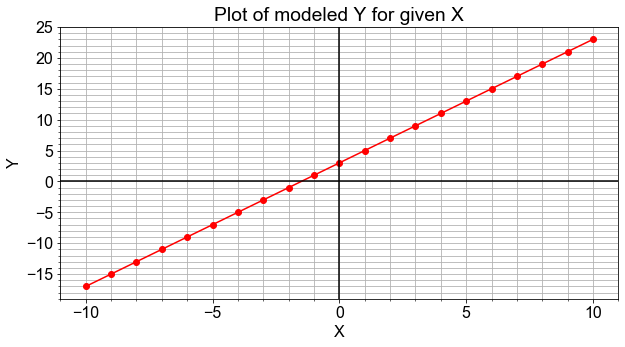

In [3]:
# Define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1 * x) + (a2 * x * x)

# Generate array x, then predict y values for specific, non-default a0 and a1
x = np.linspace(-10, 10, 21)
y = model(x)

# Plot the results, y versus x
fig = plot_prediction(x, y)

### Model Parameters
Now that you've built a general model, let's "optimize" or "fit" it to a new (preloaded) measured data set, ```xd, yd```, by finding the specific values for model parameters ```a0, a1``` for which the model data and the measured data line up on a plot.

This is an iterative visualization strategy, where we start with a guess for model parameters, pass them into the ```model()```, over-plot the resulting modeled data on the measured data, and visually check that the line passes through the points. If it doesn't, we change the model parameters and try again.

In [4]:
def plot_data(x, y):
    """
    Purpose:
        Create a plot of y versus x
    Args:
        x (np.array): array of values for the indepent variable, e.g. times
        y (np.array): array of values for the depedent variable, e.g. distances
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    from matplotlib.ticker import MultipleLocator
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    axis.plot(x, y, color="black", linestyle=" ", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 15*50])
    axis.set_xlim([-5, 15])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude (meters)')
    axis.set_xlabel('Step Distance (km)')
    axis.set_title("Hiking  Trip")
    return fig

In [5]:
xd = np.array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

yd = np.array([ 161.78587909,  132.72560763,  210.81767421,  179.6837026 ,
        181.98528167,  234.67907351,  246.48971034,  221.58691239,
        250.3924093 ,  206.43287615,  303.75089312,  312.29865056,
        323.8331032 ,  261.9686295 ,  316.64806585,  337.55295912,
        360.13633529,  369.72729852,  408.0289548 ,  348.82736117,
        394.93384188])

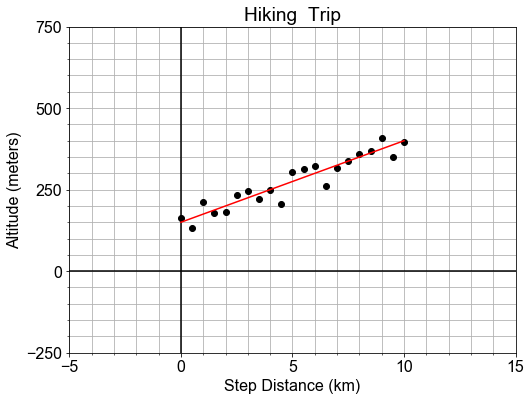

In [6]:
# Complete the plotting function definition
def plot_data_with_model(xd, yd, ym):
    fig = plot_data(xd, yd)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red')  # over-plot modeled data
    plt.show()
    return fig

# Select new model parameters a0, a1, and generate modeled `ym` from them.
a0 = 150
a1 = 25
ym = model(xd, a0, a1)

# Plot the resulting model to see whether it fits the data
fig = plot_data_with_model(xd, yd, ym)

## Interpreting Slope and Intercept
- Review: Terminology
    $$ y = a_0 + a_1 x $$
    - $x$ : independent variable, e.g. time
    - $y$ : dependent variable, e.g. distance traveled
    - $a_0$ : intercept
    - $a_1$ : slope

### Linear Proportionality
The definition of temperature scales is related to the linear expansion of certain liquids, such as mercury and alcohol. Originally, these scales were literally rulers for measuring length of fluid in the narrow marked or "graduated" tube as a proxy for temperature. The alcohol starts in a bulb, and then expands linearly into the tube, in response to increasing temperature of the bulb or whatever surrounds it.

In this exercise, we will explore the conversion between the Fahrenheit and Celsius temperature scales as a demonstration of interpreting slope and intercept of a linear relationship within a physical context.

In [7]:
def plot_temperatures(temps_C, temps_F):
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(16,4))
    axis.plot(temps_C, temps_F)
    axis.set_xlabel("Temperature (Celsius)")
    axis.set_ylabel("Temperature (Fahrenheit)")
    axis.grid()
    plt.show()
    return fig

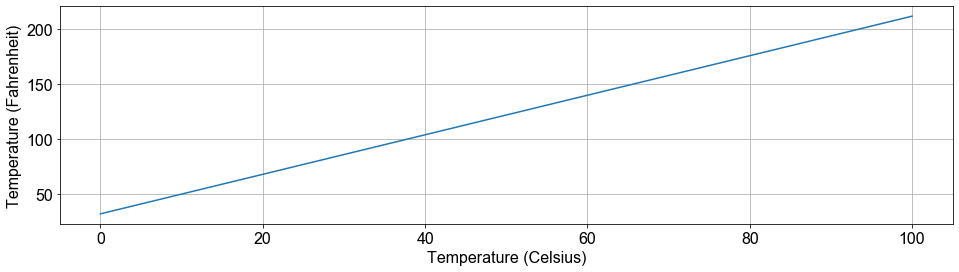

In [8]:
# Complete the functino to convert C to F
def convert_scale(temps_C):
    (freeze_C, boil_C) = (0, 100)
    (freeze_F, boil_F) = (32, 212)
    change_in_C = boil_C - freeze_C
    change_in_F = boil_F - freeze_F
    slope = change_in_F / change_in_C
    intercept = freeze_F - freeze_C
    temps_F = intercept + (slope * temps_C)
    return temps_F

# Use the convert function to compute values of F and plot them
temps_C = np.linspace(0, 100, 101)
temps_F = convert_scale(temps_C)
fig = plot_temperatures(temps_C, temps_F)

### Slope and Rates-of-Change
In this exercise, you will model the motion of a car driving (roughly) constant velocity by computing the average velocity over the entire trip. The linear relationship modeled is between the time elapsed and the distance traveled.

In this case, the model parameter ```a1```, or slope, is approximated or "estimated", as the mean velocity, or put another way, the "rate-of-change" of the distance ("rise") divided by the time ("run").

In [9]:
times = np.array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])

distances = np.array([   0.13536211,    4.11568697,    8.28931902,   12.41058595,
         16.73878397,   20.64153844,   25.14540098,   29.10323276,
         33.35991992,   37.47921914,   41.78850899,   45.66165494,
         49.9731319 ,   54.13466214,   58.42781412,   62.40834239,
         66.65229765,   70.76017847,   75.00351781,   79.2152346 ,
         83.24161507,   87.59539364,   91.74179923,   95.87520786,
        100.07507133])

In [10]:
def plot_velocity_timeseries(times, velocities):
    fig, axis = plt.subplots()
    axis.plot(times, velocities, linestyle=" ", marker=".", color='black', label='Velocities')
    axis.axhline(np.mean(velocities), color='red', alpha=0.5, lw=4, label='Mean Velocity')
    axis.grid(True, which="both")
    axis.set_ylabel("Instantaneous Velocity (Kilometers / Hours)")
    axis.set_xlabel("Time (Hours)")
    axis.set_ylim([0, 100])
    fig.tight_layout()
    fig.legend(loc='upper center')
    plt.show()
    return fig

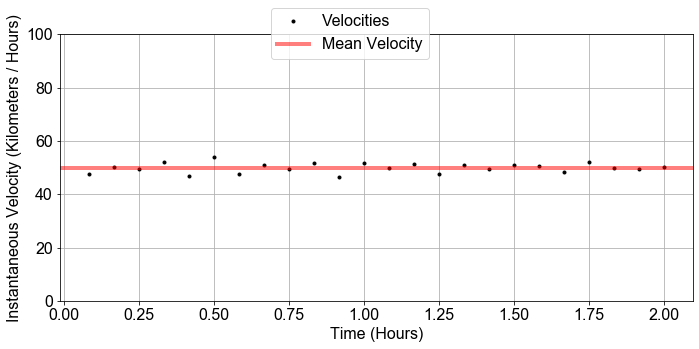

In [11]:
# Compute an array of velocities as the slope between each point
diff_distances = np.diff(distances)
diff_times = np.diff(times)
velocities = diff_distances / diff_times

# Characterize the center and spread of the velocities
v_avg = np.mean(velocities)
v_max = np.max(velocities)
v_min = np.min(velocities)
v_range = v_max - v_min

# Plot the distribution of velocities
fig = plot_velocity_timeseries(times[1:], velocities)

### Intercept and Starting Points
In this exercise, you will see the intercept and slope parameters in the context of modeling measurements taken of the volume of a solution contained in a large glass jug. The solution is composed of water, grains, sugars, and yeast. The total mass of both the solution and the glass container was also recorded, but the empty container mass was not noted.

Your job is to use the preloaded pandas DataFrame ```df```, with data columns ```volumes``` and ```masses```, to build a linear model that relates the ```masses``` (y-data) to the ```volumes``` (x-data). The slope will be an estimate of the density (change in mass / change in volume) of the solution, and the intercept will be an estimate of the empty container weight (mass when volume=0).

In [12]:
df = pd.read_csv('./dataset/linear_data.csv', index_col=0)

In [13]:
from statsmodels.formula.api import ols

# Fit a model to the data
model_fit = ols(formula="masses ~ volumes", data=df)
model_fit = model_fit.fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['volumes']

# Print model parameter values with meaningful names, and compare to summary()
print( "container_mass   = {:0.4f}".format(a0) )
print( "solution_density = {:0.4f}".format(a1) )
print( model_fit.summary() )

container_mass   = 5.4349
solution_density = 1.1029
                            OLS Regression Results                            
Dep. Variable:                 masses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          1.19e-156
Time:                        17:29:13   Log-Likelihood:                 102.39
No. Observations:                 101   AIC:                            -200.8
Df Residuals:                      99   BIC:                            -195.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## Model Optimization


### Residual Sum of the Squares
In a previous exercise, we saw that the altitude along a hiking trail was roughly fit by a linear model, and we introduced the concept of differences between the model and the data as a measure of model goodness.

In this exercise, you'll work with the same measured data, and quantifying how well a model fits it by computing the sum of the square of the "differences", also called "residuals".

In [14]:
def load_data():
    num_pts=21;a0=3.0*50;a1=0.5*50;mu=0;sigma=1;ae=0.5*50;seed=1234;
    np.random.seed(seed)
    xmin = 0
    xmax = 10
    x1 = np.linspace(xmin, xmax, num_pts)
    e1 = np.array([np.random.normal(mu, sigma) for n in range(num_pts)])
    y1 = a0 + (a1*x1) + ae*e1
    return x1, y1

In [15]:
def model(x, a0=150, a1=25):
    """
    Purpose: 
        For a given measured data x, compute the model prediction for y
        The form of the model is y = a0 + a1*x
    Args:
        x (float, np.ndarray): independent variable, e.g. time
        a0 (float): default=150, coefficient for the Zeroth order term in the model, i.e. a0
        a1 (float): default=25, coefficient for the 1st order term in the model, i.e. a1*x
    Returns:
        y (float, np.ndarray): model values predicted for corresponding input x.
    """
    y = a0 + (a1*x)
    return y

In [16]:
# Load the data
x_data, y_data = load_data()

# Model the data with specified values for parameters a0, a1
y_model = model(x_data, a0=150, a1=25)

# Compute the RSS value for this parameterization of the model
rss = np.sum(np.square(y_data - y_model))
print("RSS = {}".format(rss))

RSS = 14444.484117694472


### Minimizing the Residuals
In this exercise, you will complete a function to visually compare model and data, and compute and print the RSS. You will call it more than once to see how RSS changes when you change values for a0 and a1. We'll see that the values for the parameters we found earlier are the ones needed to minimize the RSS.

In [29]:
def plot_data_with_model_and_title(xd, yd, ym, title):
    fig = plot_data(xd, yd)
    fig.axes[0].plot(xd, ym, color="red")
    fig.axes[0].set_title(title)
    plt.show()
    return fig

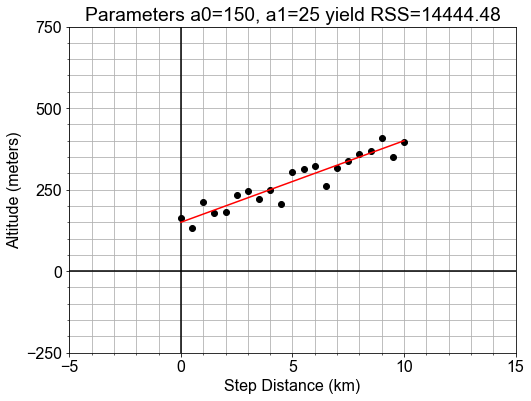

Parameters a0=150, a1=25 yield RSS=14444.48


In [30]:
# Complete function to load data, build model, compute RSS, and plot
def compute_rss_and_plot_fit(a0, a1):
    xd, yd = load_data()
    ym = model(xd, a0, a1)
    residuals = ym - yd
    rss = np.sum(np.square(residuals))
    summary = "Parameters a0={}, a1={} yield RSS={:0.2f}".format(a0, a1, rss)
    fig = plot_data_with_model_and_title(xd, yd, ym, summary)
    return rss, summary

# Chose model parameter values and pass them into RSS function
rss, summary = compute_rss_and_plot_fit(a0=150, a1=25)
print(summary)

### Visualizing the RSS Minima
In this exercise you will compute and visualize how RSS varies for different values of model parameters. Start by holding the intercept constant, but vary the slope: and for each slope value, you'll compute the model values, and the resulting RSS. Once you have an array of RSS values, you will determine minimal RSS value, in code, and from that minimum, determine the slope that resulted in that minimal RSS.

In [19]:
def compute_rss(yd, ym):
    rss = np.sum(np.square(yd - ym))
    return rss

In [20]:
def plot_rss_vs_a1(a1_array, rss_array):
    """
    Purpose:
        Plot RSS values (y-axis) versus a1 parameters values (x-axis)
        Also plot a point where the minimum RSS value occurs, and the 
        corresponding a1 value whose model resulted in that minimum RSS.
    Args:
        a1_array (np.array): an array of trial values for a1 (model slope)
        rss_array (np.array): an array of computed RSS values resulting from the a1_array
    Returns:
        fig (matplotlib.figure): figure object on which the data is plotted
    """
    from matplotlib.ticker import MultipleLocator
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(12,4))
    min_rss = np.min(rss_array) 
    best_slope = a1_array[np.where(rss_array==min_rss)]
    axis.plot(a1_array, rss_array, marker="o", color='black')
    axis.plot(best_slope, min_rss, marker="o", markersize=12, linestyle=" ", color='red')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.grid(True, which="major")
    axis.set_ylabel("RSS")
    axis.set_xlabel("Slope $a_1$")
    axis.set_ylim([0,100000])
    axis.set_title("Minimum RSS = {:.02f} \n came from $a_1$={}".format(min_rss, best_slope[0]))
    plt.show()
    return fig

In [21]:
rss_list = []

The minimum RSS = 14411.193019771845, came from a1 = [24.8]


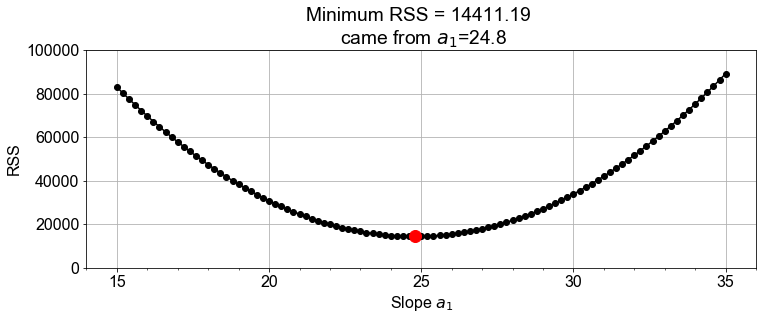

In [22]:
# Loop over all trial values in a1_array, computing rss for each
a1_array = np.linspace(15, 35, 101)
for a1_trial in a1_array:
    y_model = model(x_data, a0=150, a1=a1_trial)
    rss_value = compute_rss(y_data, y_model)
    rss_list.append(rss_value)

# Find the minimum RSS and the a1 value from whence it came
rss_array = np.array(rss_list)
best_rss = np.min(rss_array) 
best_a1 = a1_array[np.where(rss_array==best_rss)]
print('The minimum RSS = {}, came from a1 = {}'.format(best_rss, best_a1))

# Plot your rss and a1 values to confirm answer
fig = plot_rss_vs_a1(a1_array, rss_array)

## Least-Squares Optimization


### Least-Squares with `numpy`
The formulae below are the result of working through the calculus discussed in the introduction. In this exercise, we'll trust that the calculus correct, and implement these formulae in code using numpy.

$$ a_1 = \frac{covariance(x, y)}{variance(x)} $$
$$ a_0 = mean(y) - a_1 mean(x) $$

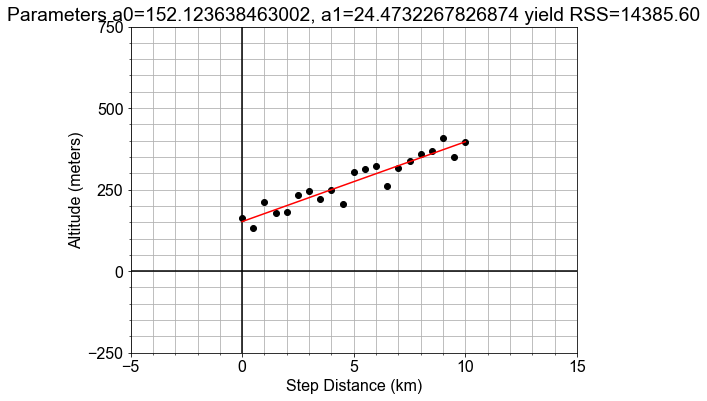

In [23]:
# prepare the means and deviations of the two variables
x_mean = np.mean(x_data)
y_mean = np.mean(y_data)
x_dev = x_data - x_mean
y_dev = y_data - y_mean

# Complete least-squares formulae to find the optimal a0, a1
a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
a0 = y_mean - (a1 * x_mean)

# Use the those optimal model parameters a0, a1 to build a model
y_model = model(x_data, a0, a1)

# plot to verify that the resulting y_model best fits the data y
fig, rss = compute_rss_and_plot_fit(a0, a1)

### Optimization with Scipy
It is possible to write a numpy implementation of the analytic solution to find the minimal RSS value. But for more complex models, finding analytic formulae is not possible, and so we turn to other methods.

In this exercise you will use ```scipy.optimize``` to employ a more general approach to solve the same optimization problem.

In so doing, you will see additional return values from the method that tell answer us "how good is best". Here we will use the same measured data and parameters as seen in the last exercise for ease of comparison of the new scipy approach.

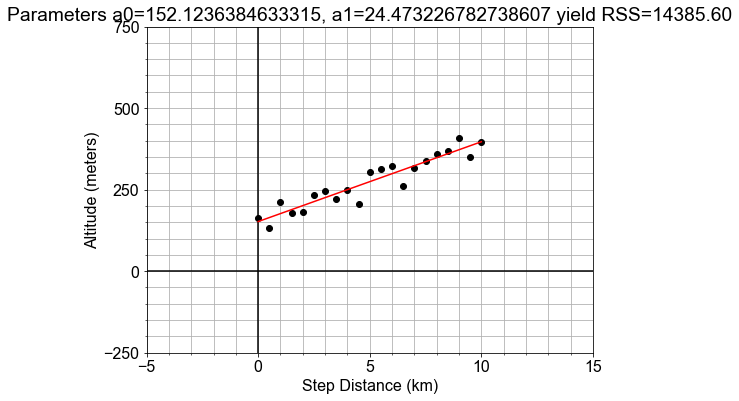

In [24]:
from scipy import optimize

# Define a model function needed as input to scipy
def model_func(x, a0, a1):
    return a0 + (a1 * x)

# Load the measured data you want to model
x_data, y_data = load_data()

# call curve_fit, passing in the model function and data; then unpack the results
param_opt, param_cov = optimize.curve_fit(model_func, x_data, y_data)
a0 = param_opt[0] # a0 is the intercept in y = a0 + a1*x
a1 = param_opt[1] # a1 is the slope     in y = a0 + a1*x

# test that these parameters result in a model that fits the data
fig, rss = compute_rss_and_plot_fit(a0, a1)

### Least-Squares with `statsmodels`
Several python libraries provide convenient abstracted interfaces so that you need not always be so explicit in handling the machinery of optimization of the model.

As an example, in this exercise, you will use the statsmodels library in a more high-level, generalized work-flow for building a model using least-squares optimization (minimization of RSS).

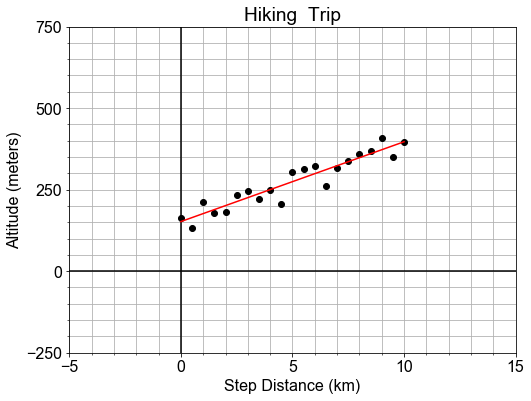

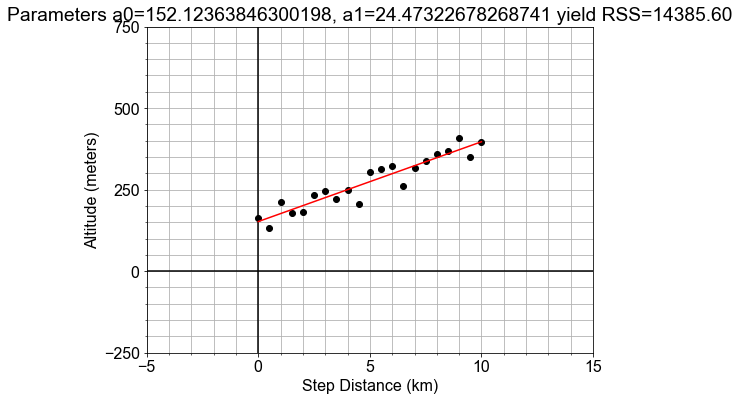

In [31]:
from statsmodels.formula.api import ols

x_data, y_data = load_data()
df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))

# Pass data and 'formula' into ols(), use and '.fit()' the model to the data
model_fit = ols(formula='y_column ~ x_column', data=df).fit()

# Use .predict(df) to get y_model values, then over-plot y_data with y_model
y_model = model_fit.predict(df)
fig = plot_data_with_model(x_data, y_data, y_model)

# Extract the a0, a1 values from model_fit.params
a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_column']

# Visually verify that these parameters a0, a1 give the minimum RSS
fig, rss = compute_rss_and_plot_fit(a0, a1)